In [136]:
import pandas as pd
import nltk
from collections import Counter

from nltk.corpus import stopwords
nltk.download("stopwords", quiet=True)
stopwords = stopwords.words("english")
stopwords.extend(["br", "ect", "hou", "com"])
import string
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", font_scale=1.2)
plt.rcParams["figure.figsize"] = [10,8]
pd.set_option.display_max_columns = 0
pd.set_option.display_max_rows = 0

In [138]:
# read in data

epa_data = pd.read_csv('../data/epa_data.csv')

In [139]:
epa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6734 entries, 0 to 6733
Data columns (total 10 columns):
EmailID                          6734 non-null object
Subject                          6516 non-null object
Message                          6734 non-null object
TaskSentence                     6734 non-null object
Judgements                       6734 non-null object
From.emailAddress.Name           6734 non-null object
From.emailAddress.ExternalId     0 non-null float64
From.emailAddress.Address        6734 non-null object
ToRecipients.emailAddressList    6734 non-null object
CcRecipients.emailAddressList    6734 non-null object
dtypes: float64(1), object(9)
memory usage: 526.2+ KB


In [140]:
epa_data.head(3)

,EmailID,Subject,Message,TaskSentence,Judgements,From.emailAddress.Name,From.emailAddress.ExternalId,From.emailAddress.Address,ToRecipients.emailAddressList,CcRecipients.emailAddressList
0,d7ZnSLcWHfdM9p97euzNkA==,Power DB Field Requirements,Chris - Attached is the spreadsheet shared wit...,Please forward back with any changes you might...,[{'1ed221006fdcbad8': ['chris.stokley@enron.co...,Fisher,NaN,steven.fisher@enron.com,"[{'emailAddress': {'Name': 'Stokley', 'Externa...",[]
1,l9qlLljWb7vV0Vz1P2/gWQ==,Re:,I agree with your proposal. <mark>Please comm...,Please communicate with Mark Holsworth.,[{'7dab55c4c50746f1': ['michelle.cash@enron.co...,Mark E Haedicke,NaN,mark.haedicke@enron.com,"[{'emailAddress': {'Name': 'Michelle Cash', 'E...",[]
2,L2HeC/lMpFK7xyVO7nxZsA==,Tony's deals,-Origin: LEWIS-A<br/>X-FileName: andy lewis 6-...,Andy - can you please forward this email to yo...,[{'7ba3b6a138bcadee': ['andrew.lewis@enron.com...,Richard Tomaski <Richard Tomaski/Corp/Enron@EN...,NaN,richard.tomaski@enron.com,"[{'emailAddress': {'Name': 'Andrew H Lewis', '...","[{'emailAddress': {'Name': 'Hunter S Shively',..."


In [141]:
# tokenize text

def ngrams(target, n=2):
    corpus = epa_data[target]
    count_vec = CountVectorizer(analyzer="word", stop_words=stopwords, ngram_range=(n, n)).fit(corpus)
    bag_of_words = count_vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [142]:
# plot 2 sns barplots side by side

def plot_bars(x1, y1, x2, y2, num_ngrams=30):
    fig, ax = plt.subplots(1,2, figsize=(20,8))
    sns.barplot(x=y1, y=x1, orient='h', palette="Reds_d", ax=ax[0])
    sns.barplot(x=y2, y=x2, orient='h', palette="Blues_d", ax=ax[1])

    ax[0].set_title("Top " + str(num_ngrams) + " Task Words")
    ax[0].set_xlabel("Keyword Frequency")
    ax[1].set_title("Top " + str(num_ngrams) + " Email Words")
    ax[1].set_xlabel("Keyword Frequency")
    plt.tight_layout()
    plt.show()

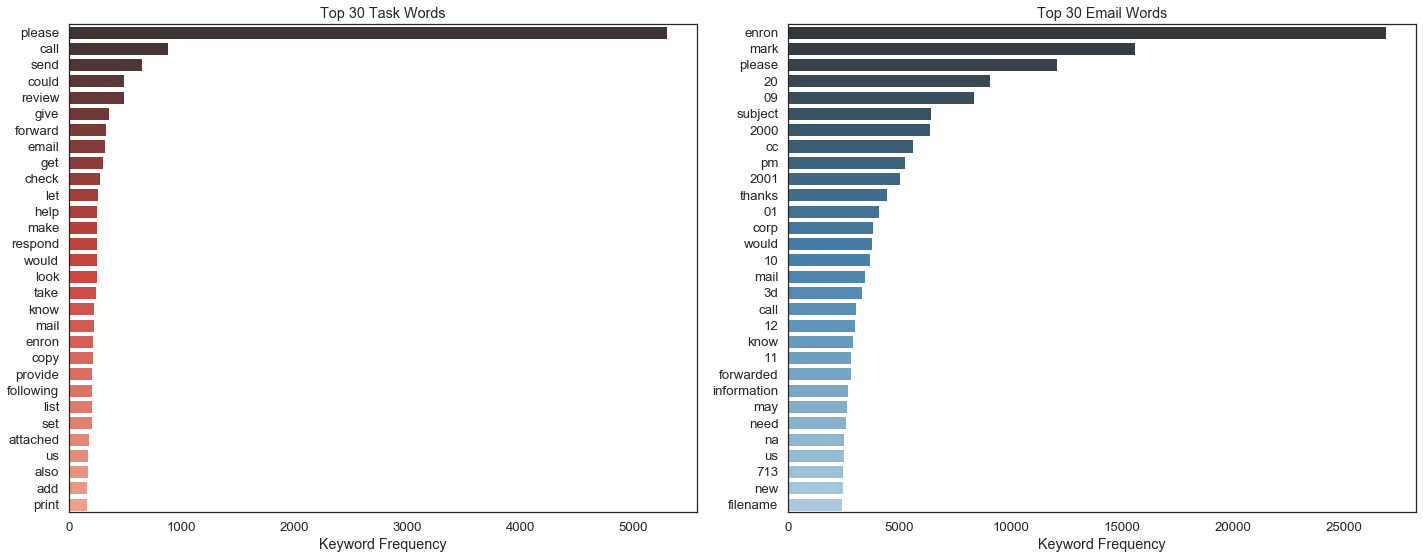

In [143]:
# word frequency

task_words = ngrams("TaskSentence", 1)[:30]
message_words = ngrams("Message", 1)[:30]

x_task, y_task = map(list, zip(*task_words))
x_message, y_message = map(list, zip(*message_words))

plot_bars(x_task, y_task, x_message, y_message)

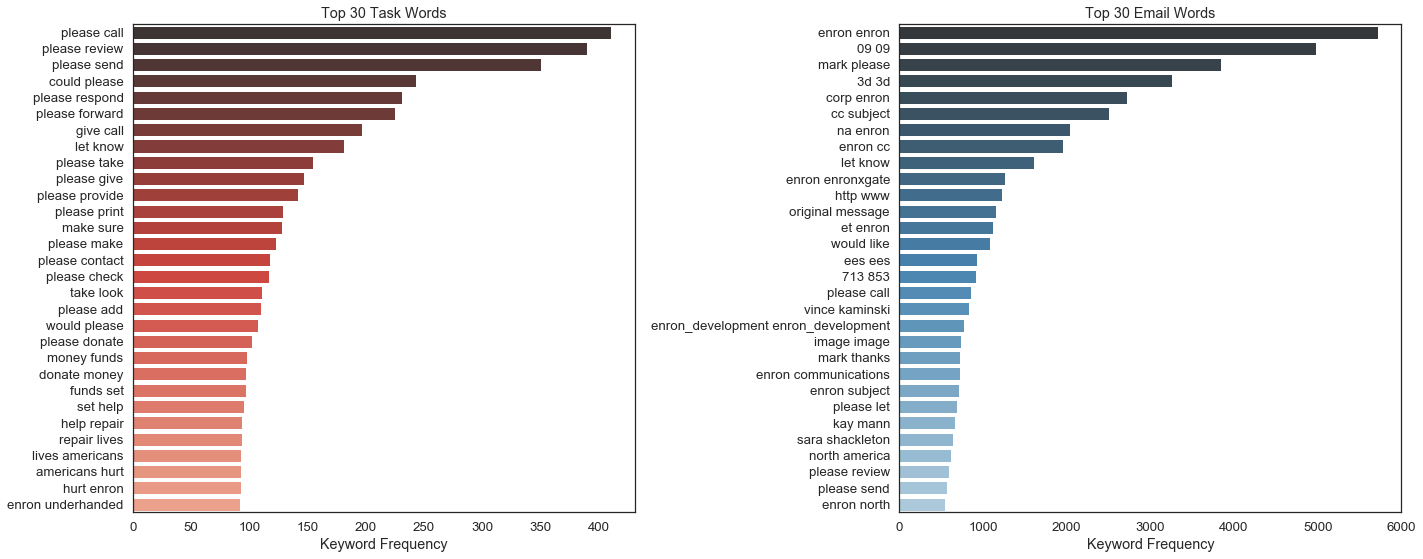

In [144]:
# bigram frequency

task_words_bigrams = ngrams("TaskSentence", 2)[:30]
message_words_bigrams = ngrams("Message", 2)[:30]

x_task_2, y_task_2 = map(list, zip(*task_words_bigrams))
x_message_2, y_message_2 = map(list, zip(*message_words_bigrams))

plot_bars(x_task_2, y_task_2, x_message_2, y_message_2)

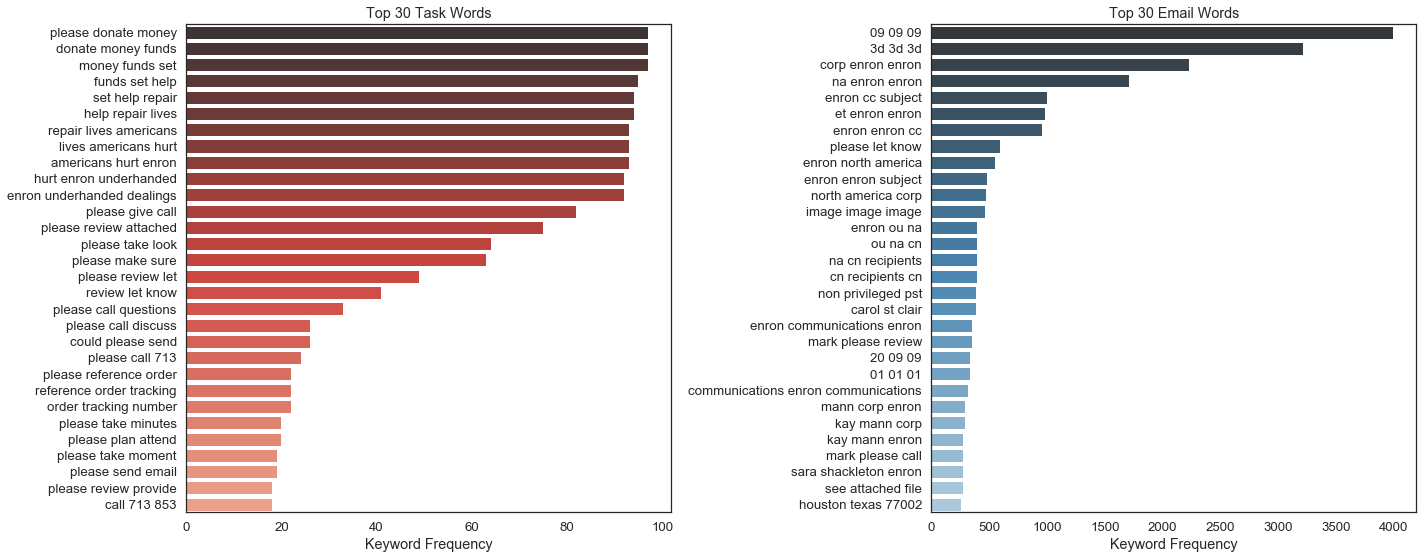

In [145]:
# trigram frequency

task_words_trigrams = ngrams("TaskSentence", 3)[:30]
message_words_trigrams = ngrams("Message", 3)[:30]

x_task_3, y_task_3 = map(list, zip(*task_words_trigrams))
x_message_3, y_message_3 = map(list, zip(*message_words_trigrams))

plot_bars(x_task_3, y_task_3, x_message_3, y_message_3)

In [ ]:
# probability a word is from task or message



In [ ]:
# probability a word is in the summary given it is in the message



In [ ]:
# sentence order by per-word overlap with task


In [ ]:
# maybe something about sentence length and per-word overlap with task ?